## Definitive Guide to Hierarchical Clustering with Python and Scikit-Learn

## Introduction ##

    In this guide, we will focus on implementing the Hierarchical Clustering Algorithm with Scikit-Learn to solve a marketing problem.

After reading the guide, you will understand:

   * When to apply Hierarchical Clustering
   * How to visualize the dataset to understand if it is fit for clustering
   * How to pre-process features and engineer new features based on the dataset
   * How to reduce the dimensionality of the dataset using PCA
   * How to use and read a dendrogram to separate groups
   * What are the different linking methods and distance metrics applied to dendrograms and clustering algorithms
   * What are the agglomerative and divisive clustering strategies and how they work
   * How to implement the Agglomerative Hierarchical Clustering with Scikit-Learn
   * What are the most frequent problems when dealing with clustering algorithms and how to solve them


## Motivation ##

Imagine a scenario in which you are part of a data science team that interfaces with the marketing department. Marketing has been gathering customer shopping data for a while, and they want to understand, based on the collected data, if there are similarities between customers. Those similarities divide customers into groups and having customer groups helps in the targeting of campaigns, promotions, conversions, and building better customer relationships.

> Is there a way you could help determine which customers are similar? How many of them belong to the same group? And how many different groups there are?

One way of answering those questions is by using a clustering algorithm, such as K-Means, DBSCAN, Hierarchical Clustering, etc. In general terms, clustering algorithms find similarities between data points and group them.

In this case, our marketing data is fairly small. We have information on only 200 customers. Considering the marketing team, it is important that we can clearly explain to them how the decisions were made based on the number of clusters, therefore explaining to them how the algorithm actually works.

Since our data is small and explicability is a major factor, we can leverage Hierarchical Clustering to solve this problem. This process is also known as Hierarchical Clustering Analysis (HCA).

    One of the advantages of HCA is that it is interpretable and works well on small datasets.

Another thing to take into consideration in this scenario is that HCA is an unsupervised algorithm. When grouping data, we won't have a way to verify that we are correctly identifying that a user belongs to a specific group (we don't know the groups). There are no labels for us to compare our results to. If we identify the groups correctly, it will be later confirmed by the marketing department on a day-to-day basis (as measured by metrics such as ROI, conversion rates, etc.).

Now that we have understood the problem we are trying to solve and how to solve it, we can start to take a look at our data!

## Brief Exploratory Data Analysis ##

 After downloading the dataset, notice that it is a CSV (comma-separated values) file called `shopping-data.csv`. To make it easier to explore and manipulate the data, we'll load it into a `DataFrame` using Pandas:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Substitute the path_to_file content by the path to your shopping-data.csv file 
path_to_file = 'shopping-data.csv'
customer_data = pd.read_csv(path_to_file)
customer_data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Marketing said it had collected 200 customer records. We can check if the downloaded data is complete with 200 rows using the `shape` attribute. It will tell us how many rows and columns we have, respectively:

In [2]:
customer_data.shape

(200, 5)

Great! Our data is complete with 200 rows (client records) and we have also 5 columns (features). To see what characteristics the marketing department has collected from customers, we can see `column `names with the columns attribute. To do that, execute:

In [3]:
customer_data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Here, we see that marketing has generated a `CustomerID`, `gathered the Genre`, `Age`, `Annual Income `(in thousands of dollars), and a Spending Score going from 1 to 100 for each of the 200 customers. When asked for clarification, they said that the values in the `Spending Score` column signify how often a person spends money in a mall on a scale of 1 to 100. In other words, if a customer has a score of 0, this person never spends money, and if the score is 100, we have just spotted the highest spender.

Let's take a quick look at the distribution of this score to inspect the spending habits of users in our dataset. That's where the Pandas `hist()` method comes in to help:

<Axes: >

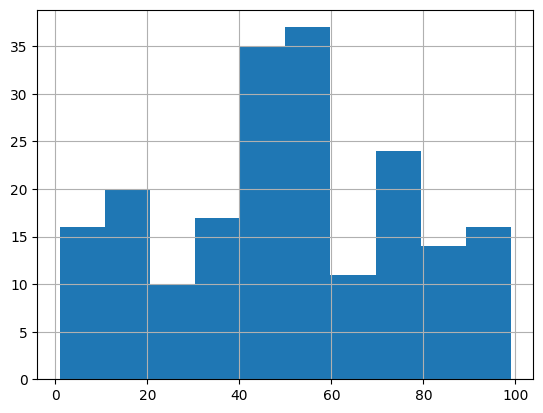

In [4]:
customer_data['Spending Score (1-100)'].hist()

By looking at the histogram we see that more than `35 `customers have scores between `40 `and `60`, then less than `25` have scores between `70` and `80`. So most of our customers are balanced spenders, followed by moderate to high spenders. We can also see that there is a line after 0, to the left of the distribution, and another line before 100, to the right of the distribution. These blank spaces probably mean that the distribution doesn't contain non-spenders, which would have a score of `0`, and that there are also no high spenders with a score of `100`.

![Image](images/images1.png)


To verify if that is true, we can look at the minimum and maximum values of the distribution. Those values can be easily found as part of the descriptive statistics, so we can use the `describe()` method to get an understanding of other numeric values distributions:

In [5]:
customer_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


Our hypothesis is confirmed. The `min` value of the `Spending ` Score is `1 `and the max is `99`. So we don't have `0` or `100` score spenders. Let's then take a look at the other columns of the transposed `describe` table. When looking at the `mean` and `std` columns, we can see that for `Age` the `mean` is 38.85 and the std is approximately 13.97. The same happens for Annual Income, with a mean of 60.56 and std 26.26, and for Spending Score with a mean of 50 and std of 25.82. For all features, the mean is far from the standard deviation, which indicates our data has high variability.

To understand better how our data varies, let's plot the Annual Income distribution:

<Axes: >

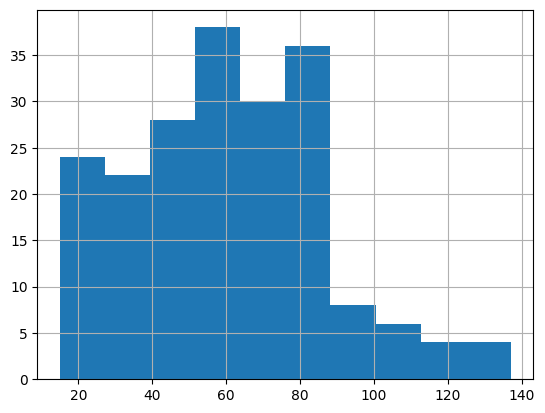

In [6]:
customer_data['Annual Income (k$)'].hist()

Notice in the histogram that most of our data, more than 35 customers, is concentrated near the number 60, on our mean, in the horizontal axis. But what happens as we move towards the ends of the distribution? When going towards the left, from the $60.560 mean, the next value we will encounter is $34.300 - the mean ($60.560) minus the standard variation ($26.260). If we go further away to the left of our data distribution a similar rule applies, we subtract the standard variation ($26.260) from the current value ($34.300). Therefore, we'll encounter a value of $8.040. Notice how our data went from $60k to $8k quickly. It is "jumping" $26.260 each time - varying a lot, and that is why we have such high variability.

![Image](images/images1.png)

>The variability and the size of the data are important in clustering analysis because distance measurements of most clustering algorithms are sensitive to data magnitudes. The difference in size can change the clustering results by making one point seem closer or more distant to another than it actually is, distorting the actual grouping of data.

So far, we have seen the shape of our data, some of its distributions, and descriptive statistics. With Pandas, we can also list our data types and see if all of our 200 rows are filled or have some `null `values:

In [7]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Here, we can see that there are no `null` values in the data and that we have only one categorical column - `Genre`. At this stage, it is important that we have in mind what features seem interesting to be added to the clustering model. If we want to add the Genre column to our model, we will need to transform its values from categorical to numerical.

Let's see how `Genre` is filled by taking a quick peek at the first 5 values of our data:

In [8]:
customer_data.head() 

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


It seems that it has only `Female` and `Male` categories. We can be sure of that by taking a look at its unique values with `unique`:

In [9]:
customer_data['Genre'].unique()

array(['Male', 'Female'], dtype=object)

So far, we know that we have only two genres, if we plan to use this feature on our model, Male could be transformed to 0 and Female to 1. It is also important to check the proportion between genres, to see if they are balanced. We can do that with the value_counts() method and its argument normalize=True to show the percentage between Male and Female:

In [10]:
customer_data['Genre'].value_counts(normalize=True)

Genre
Female    0.56
Male      0.44
Name: proportion, dtype: float64

We have 56% of women in the dataset and 44% of men. The difference between them is only 16%, and our data is not 50/50 but is balanced enough not to cause any trouble. If the results were 70/30, 60/40, then it might have been needed either to collect more data or to employ some kind of data augmentation technique to make that ratio more balanced.

Until now, all features but Age, have been briefly explored. In what concerns Age, it is usually interesting to divide it into bins to be able to segment customers based on their age groups. If we do that, we would need to transform the age categories into one number before adding them to our model. That way, instead of using the category 15-20 years, we would count how many customers there are in the 15-20 category, and that would be a number in a new column called 15-20.

After conjecturing on what could be done with both categorical - or categorical to be - Genre and Age columns, let's apply what has been discussed.
## Encoding Variables and Feature Engineering 

Let's start by dividing the Age into groups that vary in 10, so that we have 20-30, 30-40, 40-50, and so on. Since our youngest customer is 15, we can start at 15 and end at 70, which is the age of the oldest customer in the data. Starting at 15, and ending at 70, we would have 15-20, 20-30, 30-40, 40-50, 50-60, and 60-70 intervals.

To group or bin Age values into these intervals, we can use the Pandas cut() method to cut them into bins and then assign the bins to a new Age Groups column:

In [11]:
intervals = [15, 20, 30, 40, 50, 60, 70]
col = customer_data['Age']
customer_data['Age Groups'] = pd.cut(x=col, bins=intervals)

# To be able to look at the result stored in the variable
customer_data['Age Groups'] 

0      (15, 20]
1      (20, 30]
2      (15, 20]
3      (20, 30]
4      (30, 40]
         ...   
195    (30, 40]
196    (40, 50]
197    (30, 40]
198    (30, 40]
199    (20, 30]
Name: Age Groups, Length: 200, dtype: category
Categories (6, interval[int64, right]): [(15, 20] < (20, 30] < (30, 40] < (40, 50] < (50, 60] < (60, 70]]

Notice that when looking at the column values, there is also a line that specifies we have 6 categories and displays all the binned data intervals. This way, we have categorized our previously numerical data and created a new Age Groups feature.

And how many customers do we have in each category? We can quickly know that by grouping the column and counting the values with groupby() and count():

In [12]:
customer_data.groupby('Age Groups')['Age Groups'].count()

/tmp/ipykernel_12163/1439608483.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  customer_data.groupby('Age Groups')['Age Groups'].count()


Age Groups
(15, 20]    17
(20, 30]    45
(30, 40]    60
(40, 50]    38
(50, 60]    23
(60, 70]    17
Name: Age Groups, dtype: int64

It is easy to spot that most customers are between 30 and 40 years of age, followed by customers between 20 and 30 and then customers between 40 and 50. This is also good information for the Marketing department.

At the moment, we have two categorical variables, Age and Genre, which we need to transform into numbers to be able to use in our model. There are many different ways of making that transformation - we will use the Pandas get_dummies() method that creates a new column for each interval and genre and then fill its values with 0s and 1s- this kind of operation is called one-hot encoding. Let's see how it looks:

In [13]:
# The _oh means one-hot
customer_data_oh = pd.get_dummies(customer_data)
# Display the one-hot encoded dataframe
customer_data_oh 

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,"Age Groups_(15, 20]","Age Groups_(20, 30]","Age Groups_(30, 40]","Age Groups_(40, 50]","Age Groups_(50, 60]","Age Groups_(60, 70]"
0,1,19,15,39,False,True,True,False,False,False,False,False
1,2,21,15,81,False,True,False,True,False,False,False,False
2,3,20,16,6,True,False,True,False,False,False,False,False
3,4,23,16,77,True,False,False,True,False,False,False,False
4,5,31,17,40,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,35,120,79,True,False,False,False,True,False,False,False
196,197,45,126,28,True,False,False,False,False,True,False,False
197,198,32,126,74,False,True,False,False,True,False,False,False
198,199,32,137,18,False,True,False,False,True,False,False,False


## Basic Plotting and Dimensionality Reduction ##

Our dataset has 11 columns, and there are some ways in which we can visualize that data. The first one is by plotting it in 10-dimensions (good luck with that). Ten because the Customer_ID column is not being considered. The second one is by plotting our initial numerical features, and the third is by transforming our 10 features into 2 - therefore, performing a dimensionality reduction.

## Plotting Each Pair of Data ##

Since plotting 10 dimensions is a bit impossible, we'll opt to go with the second approach - we'll plot our initial features. We can choose two of them for our clustering analysis. One way we can see all of our data pairs combined is with a Seaborn pairplot():

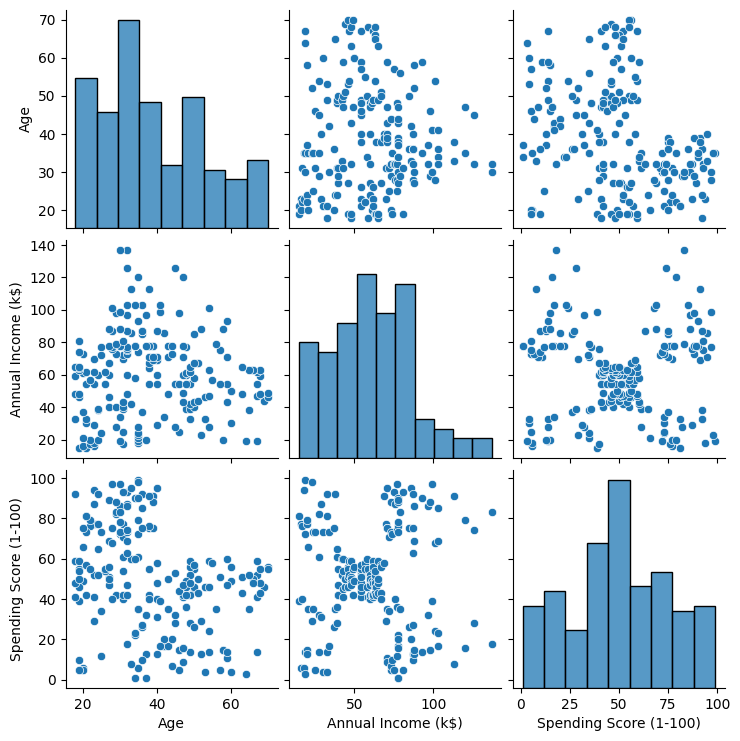

In [14]:
import seaborn as sns

# Dropping CustomerID column from data 
customer_data = customer_data.drop('CustomerID', axis=1)

sns.pairplot(customer_data)

At a glance, we can spot the scatter plots that seem to have groups of data. One that seems interesting is the scatter plot that combines Annual Income and Spending Score. Notice that there is no clear separation between other variable scatter plots. At the most, we can maybe tell that there are two distinct concentrations of points in the Spending Score vs Age scatter plot.

Both scatter plots consisting of Annual Income and Spending Score are essentially the same. We can see it twice because the x and y-axis were exchanged. By taking a look at any of them, we can see what appears to be five different groups. Let's plot just those two features with a Seaborn scatterplot() to take a closer look:

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

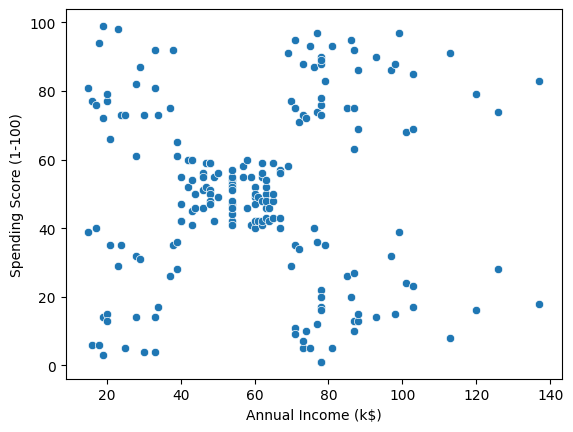

In [15]:
sns.scatterplot(x=customer_data['Annual Income (k$)'],
                y=customer_data['Spending Score (1-100)'])

By looking closer, we can definitely distinguish 5 different groups of data. It seems our customers can be clustered based on how much they make in a year and how much they spend. This is another relevant point in our analysis. It is important that we are only taking two features into consideration to group our clients. Any other information we have about them is not entering the equation. This gives the analysis meaning - if we know how much a client earns and spends, we can easily find the similarities we need.

![Image](images/images1.png)

Plotting Data After Using PCA

It seems our second approach is probably the best, but let's also take a look at our third approach. It can be useful when we can't plot the data because it has too many dimensions, or when there are no data concentrations or clear separation in groups. When those situations occur, it's recommended to try reducing data dimensions with a method called Principal Component Analysis (PCA).

PCA will reduce the dimensions of our data while trying to preserve as much of its information as possible. Let's first get an idea about how PCA works, and then we can choose how many data dimensions we will reduce our data to.

For each pair of features, PCA sees if the greater values of one variable correspond with the greater values of the other variable, and it does the same for the lesser values. So, it essentially computes how much the feature values vary towards one another - we call that their covariance. Those results are then organized into a matrix, obtaining a covariance matrix.

After getting the covariance matrix, PCA tries to find a linear combination of features that best explains it - it fits linear models until it identifies the one that explains the maximum amount of variance.

With the best line (linear combination) found, PCA gets the directions of its axes, called eigenvectors, and its linear coefficients, the eigenvalues. The combination of the eigenvectors and eigenvalues - or axes directions and coefficients - are the Principal Components of PCA. And that is when we can choose our number of dimensions based on the explained variance of each feature, by understanding which principal components we want to keep or discard based on how much variance they explain.

After obtaining the principal components, PCA uses the eigenvectors to form a vector of features that reorient the data from the original axes to the ones represented by the principal components - that's how the data dimensions are reduced.

Before applying PCA, we need to choose between the Age column or the Age Groups columns in our previously one-hot encoded data. Since both columns represent the same information, introducing it twice affects our data variance. If the Age Groups column is chosen, simply remove the Age column using the Pandas drop() method and reassign it to the customer_data_oh variable:

In [16]:
customer_data_oh = customer_data_oh.drop(['Age'], axis=1)
customer_data_oh.shape 

(200, 11)

Now our data has 10 columns, which means we can obtain one principal component by column and choose how many of them we will use by measuring how much introducing one new dimension explains more of our data variance.

Let's do that with Scikit-Learn `PCA`. We will calculate the explained variance of each dimension, given by `explained_variance_ratio_` , and then look at their cumulative sum with `cumsum()` :

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit_transform(customer_data_oh)
pca.explained_variance_ratio_.cumsum()

array([0.85268543, 0.99431178, 0.99973942, 0.99984572, 0.99990085,
       0.99993646, 0.99996214, 0.99998194, 1.        , 1.        ])

We can see that the first dimension explains 50% of the data, and when combined to the second dimension, they explain 99% percent. This means that the first 2 dimensions already explain 99% of our data. So we can apply a PCA with 2 components, obtain our principal components and plot them:

<Axes: >

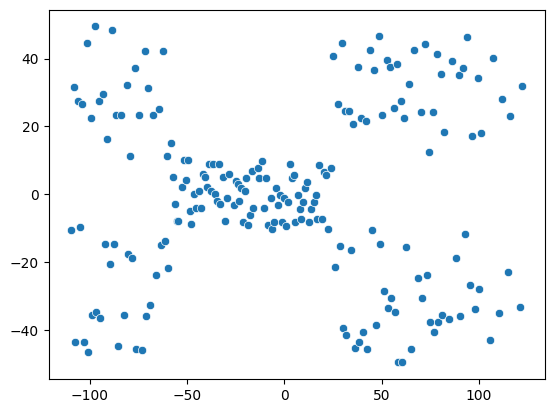

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pcs = pca.fit_transform(customer_data_oh)

pc1_values = pcs[:,0]
pc2_values = pcs[:,1]
sns.scatterplot(x=pc1_values, y=pc2_values)

The data plot after PCA is very similar to the plot that is using only two columns of the data without PCA. Notice that the points that are forming groups are closer, and a little more concentrated after the PCA than before.

![Image](images/images4.png)

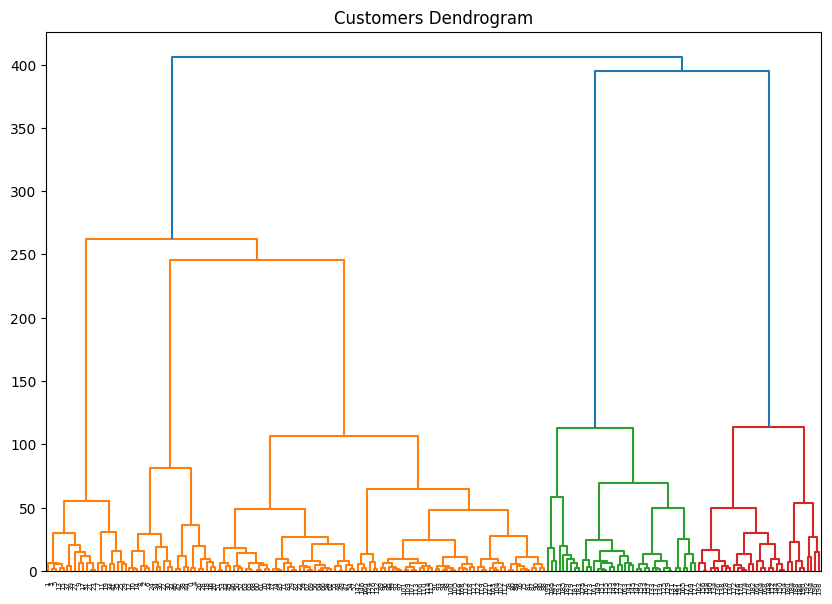

In [23]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
selected_data = customer_data_oh.iloc[:, 1:3]
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

In the script above, we've generated the clusters and sub-clusters with our points, defined how our points would link (by applying the ward method), and how to measure the distance between points (by using the euclidean metric).

With the plot of the dendrogram, the described processes of DHC and AHC can be visualized. To visualize the top-down approach, start from the top of the dendrogram and go down, and do the opposite, starting down and moving upwards to visualize the bottom-up approach.
## Linkage Methods ##

There are many other linkage methods, by understanding more about how they work, you will be able to choose the appropriate one for your needs. Besides that, each of them will yield different results when applied. There is not a fixed rule in clustering analysis, if possible, study the nature of the problem to see which fits its best, test different methods, and inspect the results.

Some of the linkage methods are:

    Single linkage: also referred to as Nearest Neighbor (NN). The distance between clusters is defined by the distance between their closest members.

![Image](images/images5.png)

* Complete linkage: also referred to as Furthest Neighbor (FN), Farthest Point Algorithm, or VoorHees Algorithm. The distance between clusters is defined by the distance between their furthest members. This method is computationally expensive.

![Image](images/images6.png)

* Average linkage: also known as UPGMA (Unweighted Pair Group Method with Arithmetic mean)*. The percentage of the number of points of each cluster is calculated with respect to the number of points of the two clusters if they were merged.

![Image](images/images7.png)


 * Weighted linkage: also known as WPGMA (Weighted Pair Group Method with Arithmetic mean)*. The individual points of the two clusters contribute to the aggregated distance between a smaller and a bigger cluster.
* Centroid linkage: also referred to as UPGMC (Unweighted Pair Group Method using Centroids)*. A point defined by the mean of all points (centroid) is calculated for each cluster and the distance between clusters is the distance between their respective centroids.

![Image](images/images9.png)

* Ward linkage: Also known as MISSQ (Minimal Increase of Sum-of-Squares)*. It specifies the distance between two clusters, computes the sum of squares error (ESS), and successively chooses the next clusters based on the smaller ESS. Ward's Method seeks to minimize the increase of ESS at each step. Therefore, minimizing error.
![Image](images/images8.png)

## Distance Metrics ##

Besides the linkage, we can also specify some of the most used distance metrics:

     Euclidean : also referred to as Pythagorean or straight-line distance. It computes the distance between two points in space, by measuring the length of a line segment that passes between them. It uses the Pythagorean theorem and the distance value is the result (c) of the equation:

![Image](images/images10.png)

    Manhattan: also called City-block, Taxicab distance. It is the sum of absolute differences between the measures in all dimensions of two points. If those dimensions are two, it is analogous to making a right and then left when walking one block.

![Image](images/images11.png)

* Minkowski: it is a generalization of both Euclidean and Manhattan distances. It is a way to calculate distances based on the absolute differences to the order of the Minkowski metric p. Although it is defined for any p > 0, it is rarely used for values other than 1, 2, and ∞ (infinite). Minkowski distance is the same as Manhattan distance when p=1, and the same as Euclidean distance when p=2.

![Image](images/images12.png)

img

    *  Chebyshev: also known as Chessboard distance. It is the extreme case of Minkowski distance. When we use infinity as the value of the parameter p (p = ∞), we end up with a metric that defines distance as the maximal absolute difference between coordinates.
   * Cosine: it is the angular cosine distance between two sequences of points, or vectors. The cosine similarity is the dot product of the vectors divided by the product of their lengths.
   * Jaccard: measures the similarity between finite sets of points. It is defined as the total number of points (cardinality) in the common points in each set (intersection), divided by the total number of points (cardinality) of the total points of both sets (union).
    * Jensen-Shannon: based on the Kullback-Leibler divergence. It considers the points' probability distributions and measures the similarity between those distributions. It is a popular method of probability theory and statistics.





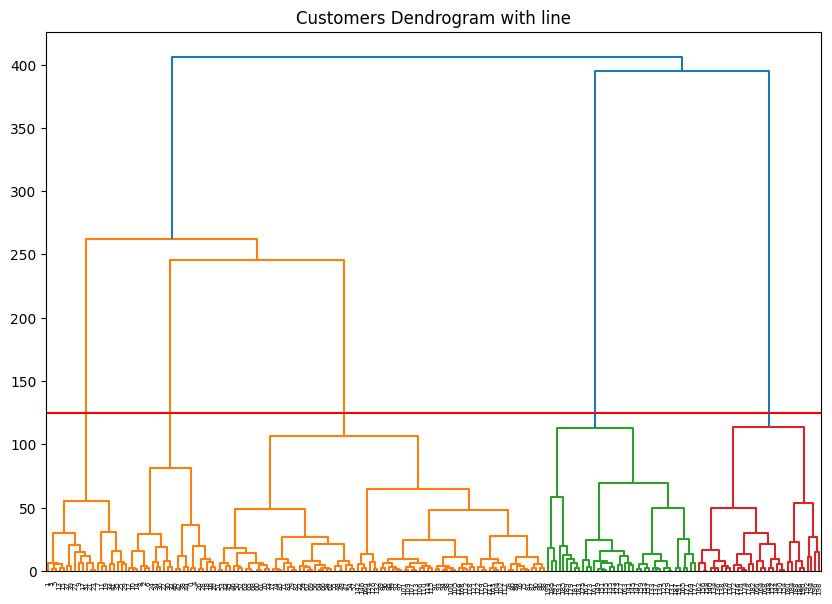

In [20]:
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram with line")
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(clusters)
plt.axhline(y = 125, color = 'r', linestyle = '-')

In [21]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
clustering_model.fit(selected_data)
labels = clustering_model.labels_
print(labels)


[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


Text(0.5, 1.0, 'Labeled Customer Data')

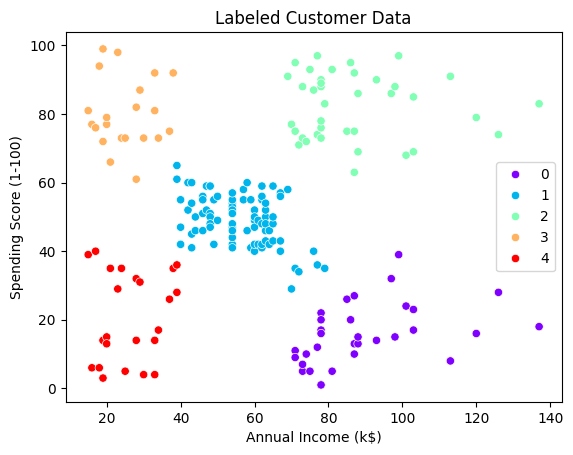

In [22]:
data_labels = clustering_model.labels_
sns.scatterplot(x='Annual Income (k$)', 
                y='Spending Score (1-100)', 
                data=selected_data, 
                hue=data_labels,
                palette="rainbow").set_title('Labeled Customer Data')